In [25]:
import numpy as np
import pandas as pd

In [26]:
def loading_data(data_file):
    data_frame=pd.read_csv(data_file)
    return data_frame

In [27]:
def predict_y_score(dataFrame):
    dataFrame['predicted_y'] = (dataFrame.proba >= 0.5).astype('int')
    return dataFrame

In [28]:
def find_confuse_matrix_parameter(y, y_score):
    TP = sum((y == 1) & (y_score == 1))
    FN = sum((y == 1) & (y_score == 0))
    FP = sum((y == 0) & (y_score == 1))
    TN = sum((y == 0) & (y_score == 0))
    return TP, FN, FP, TN

In [29]:
def confusion_matrix(y, y_score):
    TP, FN, FP, TN = find_confuse_matrix_parameter(y, y_score)
    return np.array([[TN, FP], [FN, TP]])

In [30]:
def accuraccy_score(y, y_score):

    TP, FN, FP, TN = find_confuse_matrix_parameter(y, y_score)
    return ((TP + TN) / (TP + FN + FP + TN))

In [31]:
def compute_f1_score(y,y_score):
    TP,FN,FP,TN=find_confuse_matrix_parameter(y,y_score)
    precision= TP/(TP+FP)
    recall=TP/(TP+FN)
    f1=(2*precision*recall)/(precision+recall)
    return f1

In [32]:
def calculate_A(y, y_score):
    TP = sum((y == 1) & (y_score == 1))
    FN = sum((y == 1) & (y_score == 0))
    FP = sum((y == 0) & (y_score == 1))
    TN = sum((y == 0) & (y_score == 0))
    A = 500 * FN + 100 * FP
    accuracy = ((TP + TN) / (TP + FN + FP + TN))
    return A, accuracy

In [33]:
import random

import matplotlib.pyplot as plt


def compute_auc_score(file_name):
    data_frame = loading_data(file_name)
    threashold_list = data_frame.proba.unique()
    fpr = []
    tpr = []

    sorted_list = sorted(threashold_list, reverse=True)

    for val in sorted_list:
        data_frame['predicted_y'] = (data_frame.proba >= val).astype('int')
        TP, FN, FP, TN = find_confuse_matrix_parameter(
            data_frame['y'], data_frame['predicted_y'])
        FPR = FP / (FP + TN)
        TPR = TP / (TP + FN)

        fpr.append(FPR)
        tpr.append(TPR)

    auc_score = np.trapz(tpr, fpr)

    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    return auc_score

In [35]:
def compute_performance_matrix(file_name):
    data_frame = loading_data(file_name)

    data_frame = predict_y_score(data_frame)
    y, y_score = data_frame['y'], data_frame['predicted_y']
    matrix = confusion_matrix(y, y_score)
    acc_score = accuraccy_score(y, y_score)
    f1_score = compute_f1_score(y, y_score)
    auc_score=compute_auc_score(file_name)
    print('confusion matrix \n {} \n for file {} '.format(matrix, file_name))
    print('accurracy score  {}  for file {} '.format(acc_score, file_name))
    print('F1 score  {}  for file {} '.format(f1_score, file_name))
    print('AUC score  {}  for file {} '.format(auc_score, file_name))

    print('*' * 100)

# Compute performance matrix - A

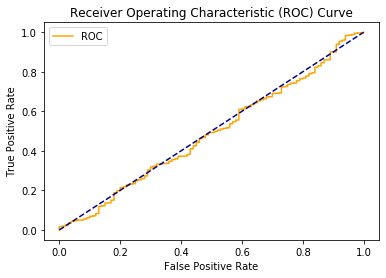

confusion matrix 
 [[    0   100]
 [    0 10000]] 
 for file 5_a.csv 
accurracy score  0.9900990099009901  for file 5_a.csv 
F1 score  0.9950248756218906  for file 5_a.csv 
AUC score  0.48829900000000004  for file 5_a.csv 
****************************************************************************************************


In [36]:
compute_performance_matrix('5_a.csv')

# Compute performance matrix - B

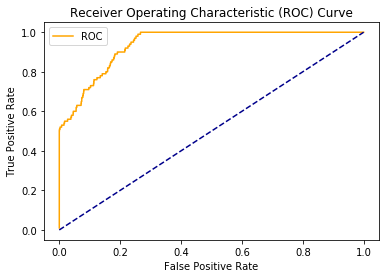

confusion matrix 
 [[9761  239]
 [  45   55]] 
 for file 5_b.csv 
accurracy score  0.9718811881188119  for file 5_b.csv 
F1 score  0.2791878172588833  for file 5_b.csv 
AUC score  0.9377570000000001  for file 5_b.csv 
****************************************************************************************************


In [37]:
compute_performance_matrix('5_b.csv')

In [38]:
df=loading_data('5_c.csv')
df.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [39]:
def predict_y_score(dataFrame,threashold_value):
    dataFrame['predicted_y'] = (dataFrame.prob >= threashold_value).astype('int')
    return dataFrame

# calculate threashold value- C

In [40]:
import random


def calculate_best_threashold_value():
   
    threashold_list=df.prob.unique()
   
    score = {}
    fpr=[]
    tpr=[]
    acc = {}
    for val in threashold_list:
        predict_y_score(df, val)
        A, accuracy = calculate_A(df['y'], df['predicted_y'])
        score[val] = A
        acc[val] = accuracy
        TP, FN, FP, TN = find_confuse_matrix_parameter(
            df['y'], df['predicted_y'])
        FPR = FP / (FP + TN)
        TPR = TP / (TP + FN)
        
        fpr.append(FPR)
        tpr.append(TPR)
    best_threashold_value = min(score.items(), key=lambda x: x[1])
    auc1 = np.trapz(tpr, fpr)
    print(auc1)
    return best_threashold_value


In [41]:
def verify_threashold_score():
    best_threashold=calculate_best_threashold_value()
    print('best threashold value is {} using A calculate method ' . format(best_threashold[0]))
    data_frame = loading_data("5_c.csv")
    data_frame = predict_y_score(data_frame,best_threashold[0])

    matrix = confusion_matrix(data_frame['y'], data_frame['predicted_y'])
    acc_score = accuraccy_score(data_frame['y'], data_frame['predicted_y'])
    print('confusion matrix \n {} \n for file  '.format(matrix))
    print('accurracy score  {}  for file  '.format(acc_score))
    print('-' * 100)
    
verify_threashold_score()

0.8798019403810418
best threashold value is 0.2300390278970873 using A calculate method 
confusion matrix 
 [[ 785 1020]
 [  78  969]] 
 for file  
accurracy score  0.615007012622721  for file  
----------------------------------------------------------------------------------------------------


In [42]:
def calculate_mse():
    data=loading_data('5_d.csv')
    error = data['y'] - data['pred']
    squared_error = error**2
    addition=squared_error.sum()
    size = len(data)
    mean_square_error = addition / size
    return mean_square_error,error,size

# MSE - D

In [43]:
squared_err,error,data_size=calculate_mse()
print('mean squared error is = {}'.format(squared_err))

mean squared error is = 177.16569974554707


# MAPE - D

In [44]:
import sys


def calculate_mape():

    data = loading_data('5_d.csv')

    y_values = data['y']
    average_value = y_values.sum() / len(data)
    error = y_values - data['pred']

    abs_sum = (np.abs(error / average_value)).sum()

    mape = abs_sum / len(data) * 100
    return mape


mape_value = calculate_mape()

print('mape value is {} '.format(mape_value))

mape value is 12.912029940096867 


# R2 LOSS

In [45]:
def calculate_r():
    data = loading_data('5_d.csv')
    size = len(data)
    mean_y = ((data['y']).sum()) / size

    total_sum_of_square = ((data['y'] - mean_y)**2).sum()
    total_sum_of_residues = ((data['y'] - data['pred'])**2).sum()

    r = 1 - (total_sum_of_residues / total_sum_of_square)
    return r


r_square_loss = calculate_r()

print('r square loss is {} '.format(r_square_loss))

r square loss is 0.9563582786990937 
